# Customer Analysis

In [24]:
import pandas as pd

In [24]:
import os
os.getcwd()

'C:\\Users\\Andy\\documents\\ironhack\\Labs\\Week1\\lab-customer-analysis-round-6'

In [25]:
marketing_customers = pd.read_csv('files_for_lab//csv_files//marketing_customer_analysis.csv')

In [26]:
marketing_customers.shape

(9134, 24)

### Data Cleaning

In [26]:
# remove Unnamed: 0
# marketing_customers = marketing_customers.drop(columns=['Unnamed: 0'])

# drop to lower case
marketing_customers.columns = list(map(lambda x:x.lower(),marketing_customers.columns))

# replace spaces with _
#marketing_customers.columns = marketing_customers.columns.apply(lambda x : x.replace(' ','_'))
marketing_customers.columns = list(map(lambda x:x.replace(' ','_'),marketing_customers.columns))

# set 'effective_to_date' to date type
marketing_customers['effective_to_date'] = pd.to_datetime(marketing_customers['effective_to_date'])

In [9]:
marketing_customers.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [28]:
summary = pd.concat([marketing_customers.isna().sum(), round(marketing_customers.isna().sum()/len(marketing_customers),4)*100 ],axis=1)
summary = summary.set_axis(['Null Volumes','Null %'], axis=1)

summary[summary['Null Volumes']>0]


,Null Volumes,Null %


## Actions to take:

#### State - delete or set to unknown
#### Response - delete or set to unknown

#### Months since last claim - ***not checked, though likely set to 0 or an average***
#### Number of open complaints - ***not check, though likely set to 0 or an average***

#### Vehicle class - set nulls to 'Four-Door Car'
#### Vehicle size - set nulls to 'Medsize'

#### Vehicle type - keep but be mindful that it is 50% null values

In [27]:
# actions for handling nulls

# delete    df = df[<filter>]
#marketing_customers = marketing_customers[marketing_customers['state'].isna()==False]
#marketing_customers = marketing_customers[marketing_customers['state']!='Unknown']
#above would also apply to resposne anyway

# fill in another value    .fillna(<value>)
marketing_customers['state'] = marketing_customers['state'].fillna('Unknown')
marketing_customers['response'] = marketing_customers['response'].fillna('Unknown')

#marketing_customers['months since last claim'] = marketing_customers['months since last claim'].fillna(0)
#marketing_customers['number of open complaints'] = marketing_customers['number of open complaints'].fillna(0)
# or
marketing_customers['months_since_last_claim'] = marketing_customers['months_since_last_claim'].fillna(marketing_customers['months_since_last_claim'].mean())
marketing_customers['number_of_open_complaints'] = marketing_customers['number_of_open_complaints'].fillna(marketing_customers['number_of_open_complaints'].mean())

marketing_customers['vehicle_class'] = marketing_customers['vehicle_class'].fillna('Four-Door Car')
marketing_customers['vehicle_size'] = marketing_customers['vehicle_size'].fillna('Medsize')





In [30]:
pd.set_option('max_columns',25)
print("-----state-----")
print(marketing_customers['state'].value_counts())
print("Null count: " + str(len(marketing_customers[marketing_customers['state'].isna()])))
print("")
#marketing_customers[marketing_customers['state'].isna() & marketing_customers['response'].isna()]

# When state is null response is also null

-----state-----
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64
Null count: 0



In [31]:
pd.set_option('max_columns',25)
print("-----response-----")
print(marketing_customers['response'].value_counts())
print("Null count: " + str(len(marketing_customers[marketing_customers['response'].isna()])))
print("")


-----response-----
No     7826
Yes    1308
Name: response, dtype: int64
Null count: 0



In [32]:
pd.set_option('max_columns',25)
print("-----months since last claim-----")
print(marketing_customers['months_since_last_claim'].value_counts())
print("Null count: " + str(len(marketing_customers[marketing_customers['months_since_last_claim'].isna()])))
print("")
print(len(marketing_customers[marketing_customers['months_since_last_claim'].isna()]))
print(len(marketing_customers[marketing_customers['months_since_last_claim'].isna() & marketing_customers['number_of_open_complaints'].isna()]))

# When 'months since last claim' is null 'number of open complaints' is also null

-----months since last claim-----
3     381
6     364
1     345
4     335
7     333
2     329
0     314
5     313
10    306
11    297
16    295
15    286
13    285
8     279
12    273
14    268
17    263
9     250
19    246
23    239
25    236
21    233
20    231
18    229
22    218
24    211
29    206
28    201
31    190
26    186
30    182
27    182
33    179
34    169
35    142
32    138
Name: months_since_last_claim, dtype: int64
Null count: 0

0
0


In [33]:
pd.set_option('max_columns',25)
print("-----vehicle class-----")
print(marketing_customers['vehicle_class'].value_counts())
print("Null count: " + str(len(marketing_customers[marketing_customers['vehicle_class'].isna()])))
print("")
print(len(marketing_customers[marketing_customers['vehicle_class'].isna()]))
print(len(marketing_customers[marketing_customers['vehicle_class'].isna() & marketing_customers['vehicle_size'].isna()]))

# When 'vehicle class' is null 'vehcile size' is also null

-----vehicle class-----
Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle_class, dtype: int64
Null count: 0

0
0


In [34]:
pd.set_option('max_columns',25)
print("-----vehicle size-----")
print(marketing_customers['vehicle_size'].value_counts())
print("Null count: " + str(len(marketing_customers[marketing_customers['vehicle_size'].isna()])))
print("")

-----vehicle size-----
Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64
Null count: 0



In [35]:
effdate = pd.to_datetime(marketing_customers['effective_to_date'])

In [36]:
effdate

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

In [38]:
# example: df[(df['date'] > '2013-01-01') & (df['date'] < '2013-02-01')]

#marketing_customers['effective_to_date'] = pd.to_datetime(marketing_customers['effective_to_date'])
#marketing_customers.dtypes

marketing_customers[(marketing_customers['effective_to_date']>='2011-01-01') & (marketing_customers['effective_to_date'] < '2011-03-01')]
#print(marketing_customers['effective_to_date'].min())
#print(marketing_customers['effective_to_date'].max())

# data effectively already filter to first quarter as only jan/feb exist.

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large



## Start of Round 3, ding ding!

### Describe the data



In [39]:
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

#show dataframe info
display(marketing_customers.head())
marketing_customers.dtypes

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [40]:
#describe dataframe
display(marketing_customers.describe().T)
display(marketing_customers.describe(include=[object]).T) # the waning for np.object advised it was 
                                                          # deprecated and stated to just use object
#marketing_customers.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
monthly_premium_auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
months_since_last_claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
months_since_policy_inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
number_of_open_complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
number_of_policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


,count,unique,top,freq
customer,9134,9134,BU79786,1
state,9134,5,California,3150
response,9134,2,No,7826
coverage,9134,3,Basic,5568
education,9134,5,Bachelor,2748
employmentstatus,9134,5,Employed,5698
gender,9134,2,F,4658
location_code,9134,3,Suburban,5779
marital_status,9134,3,Married,5298
policy_type,9134,3,Personal Auto,6788


#### Show a plot of the total number of responses.
#### Show a plot of the response rate by the sales channel.
#### Show a plot of the response rate by the total claim amount.
#### Show a plot of the response rate by income.

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:xlabel='response', ylabel='count'>

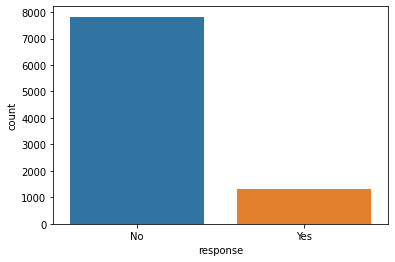

In [42]:
sns.countplot(x='response', data=marketing_customers)
#sns.barplot(x=marketing_customers.response.value_counts().index, y=marketing_customers.response.value_counts())

In [43]:
marketing_customers.sales_channel.value_counts()

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: sales_channel, dtype: int64

In [44]:
## group response rate by sales channel

# count the yes responses in each channel and devide by total responses in each channel
marketing_customers['response_positive'] = marketing_customers['response']=='Yes'
marketing_customers['response_valid'] = marketing_customers['response'].isin(['Yes','No'])


<AxesSubplot:xlabel='sales_channel', ylabel='response_rates'>

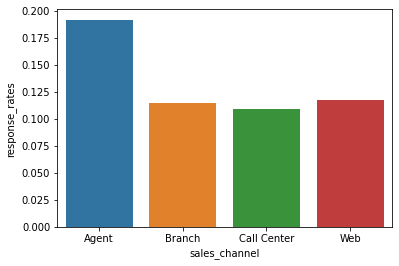

In [45]:
response_rates_by_sales_channel = marketing_customers.groupby("sales_channel")["response_positive"].sum()/marketing_customers.groupby("sales_channel")["response_valid"].sum()
response_rates_by_sales_channel = pd.DataFrame(response_rates_by_sales_channel, columns=['response_rates'])
response_rates_by_sales_channel
sns.barplot(x=response_rates_by_sales_channel.index, y=response_rates_by_sales_channel.response_rates)

In [46]:
response_rates_by_state = marketing_customers.groupby("state")["response_positive"].sum()/marketing_customers.groupby("state")["response_valid"].sum()
response_rates_by_state = pd.DataFrame(response_rates_by_state, columns=['response_rates'])


In [47]:
response_rates_by_num_of_policies = marketing_customers.groupby("number_of_policies")["response_positive"].sum()/marketing_customers.groupby("number_of_policies")["response_valid"].sum()
response_rates_by_num_of_policies = pd.DataFrame(response_rates_by_num_of_policies, columns=['response_rates'])
response_rates_by_num_of_policies


,response_rates
number_of_policies,
1,0.158720
2,0.149085
3,0.113014
4,0.102689
5,0.147420
6,0.112903
7,0.138568
8,0.109375
9,0.173077


In [48]:
print(marketing_customers.groupby("number_of_policies")["total_claim_amount"].mean())
print(marketing_customers.groupby("number_of_policies")["total_claim_amount"].median())

#marketing_customers.effective_to_date.value_counts()

number_of_policies
1    440.278532
2    433.610653
3    415.969821
4    428.791219
5    428.755107
6    410.962617
7    468.401546
8    445.049999
9    424.499642
Name: total_claim_amount, dtype: float64
number_of_policies
1    384.000000
2    393.600000
3    373.497423
4    364.800000
5    369.600000
6    353.970473
7    398.400000
8    393.600000
9    368.415441
Name: total_claim_amount, dtype: float64


In [49]:
marketing_customers['total_claim_amount_100q_bins'] =  pd.qcut(marketing_customers['total_claim_amount'], 50)
display(marketing_customers[['total_claim_amount','total_claim_amount_100q_bins']])

,total_claim_amount,total_claim_amount_100q_bins
0,384.811147,"(383.945, 398.4]"
1,1131.464935,"(1027.0, 1272.508]"
2,566.472247,"(556.8, 571.2]"
3,529.881344,"(528.0, 542.4]"
4,138.130879,"(123.512, 144.758]"
...,...,...
9129,198.234764,"(189.905, 212.799]"
9130,379.200000,"(369.6, 383.945]"
9131,790.784983,"(773.434, 834.059]"
9132,691.200000,"(678.49, 725.871]"


<AxesSubplot:xlabel='total_claim_amount_100q_bins', ylabel='response_rates'>

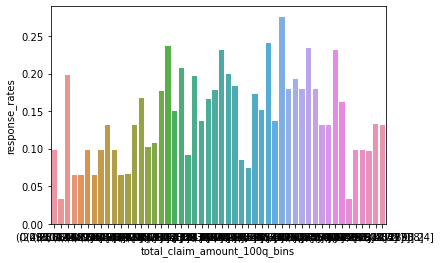

In [50]:
response_rates_by_claim_bins = marketing_customers.groupby("total_claim_amount_100q_bins")["response_positive"].sum()/marketing_customers.groupby("total_claim_amount_100q_bins")["response_valid"].sum()
response_rates_by_claim_bins = pd.DataFrame(response_rates_by_claim_bins, columns=['response_rates'])

sns.barplot(x=response_rates_by_claim_bins.index, y=response_rates_by_claim_bins.response_rates)

,total_claim_amount,total_claim_amount_10q_bins
0,384.811147,"(383.945, 453.6]"
1,1131.464935,"(773.434, 2893.24]"
2,566.472247,"(513.6, 599.062]"
3,529.881344,"(513.6, 599.062]"
4,138.130879,"(104.085, 212.799]"
...,...,...
9129,198.234764,"(104.085, 212.799]"
9130,379.200000,"(334.039, 383.945]"
9131,790.784983,"(773.434, 2893.24]"
9132,691.200000,"(599.062, 773.434]"


<AxesSubplot:xlabel='total_claim_amount_10q_bins', ylabel='response_rates'>

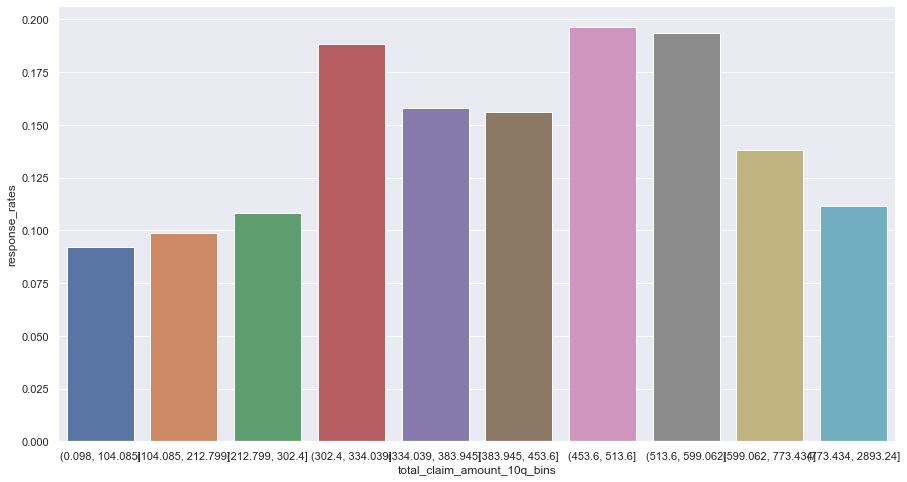

In [51]:
marketing_customers['total_claim_amount_10q_bins'] =  pd.qcut(marketing_customers['total_claim_amount'], 10)
display(marketing_customers[['total_claim_amount','total_claim_amount_10q_bins']])

response_rates_by_claim_bins = marketing_customers.groupby("total_claim_amount_10q_bins")["response_positive"].sum()/marketing_customers.groupby("total_claim_amount_10q_bins")["response_valid"].sum()
response_rates_by_claim_bins = pd.DataFrame(response_rates_by_claim_bins, columns=['response_rates'])

sns.set(rc = {'figure.figsize':(15,8)})
sns.barplot(x=response_rates_by_claim_bins.index, y=response_rates_by_claim_bins.response_rates)

<AxesSubplot:xlabel='income', ylabel='total_claim_amount'>

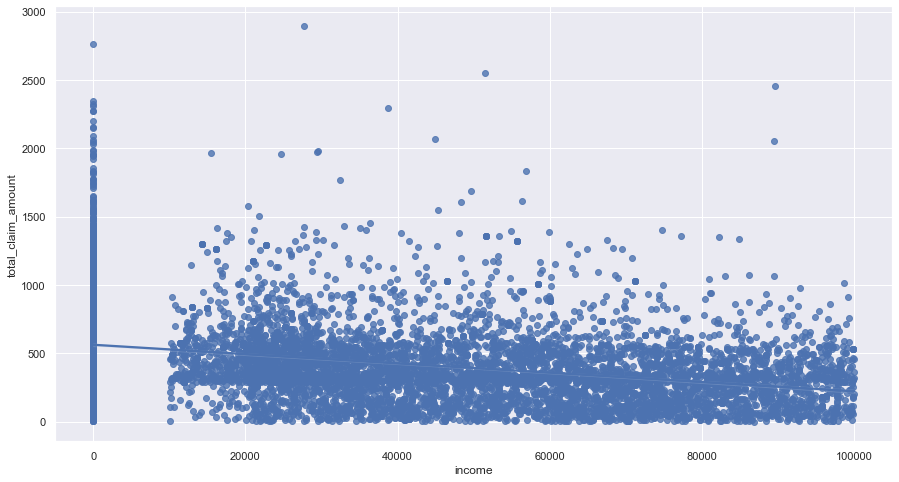

In [53]:
# playing with scatter plot
#sns.scatterplot(x=marketing_customers.income, y=marketing_customers.total_claim_amount)
sns.regplot(x="income", y="total_claim_amount", data=marketing_customers)

<AxesSubplot:xlabel='income_10q_bins', ylabel='response_rates'>

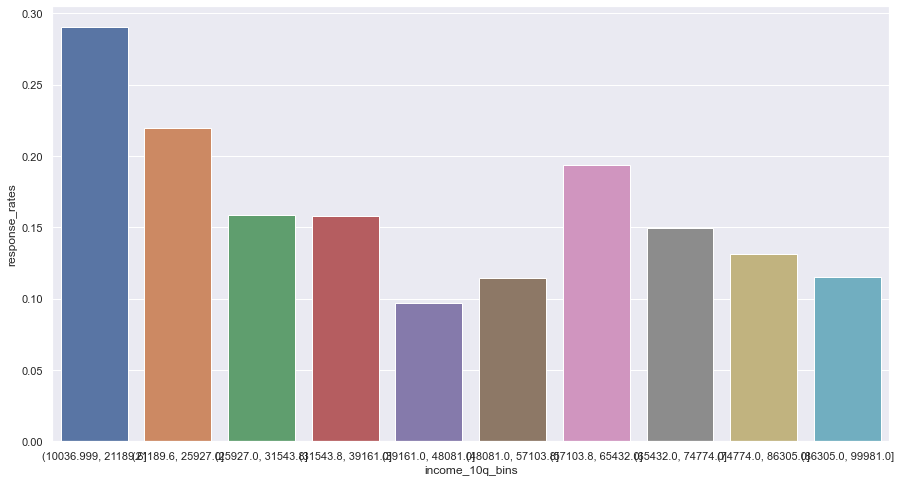

In [54]:
marketing_customers_with_income = marketing_customers[marketing_customers.income > 0]
marketing_customers_with_income['income_10q_bins'] =  pd.qcut(marketing_customers_with_income['income'], 10)

response_rates_by_income_bins = marketing_customers_with_income.groupby("income_10q_bins")["response_positive"].sum()/marketing_customers_with_income.groupby("income_10q_bins")["response_valid"].sum()
response_rates_by_income_bins = pd.DataFrame(response_rates_by_income_bins, columns=['response_rates'])

sns.set(rc = {'figure.figsize':(15,8)})
sns.barplot(x=response_rates_by_income_bins.index, y=response_rates_by_income_bins.response_rates)

<AxesSubplot:xlabel='sales_channel', ylabel='Probability'>

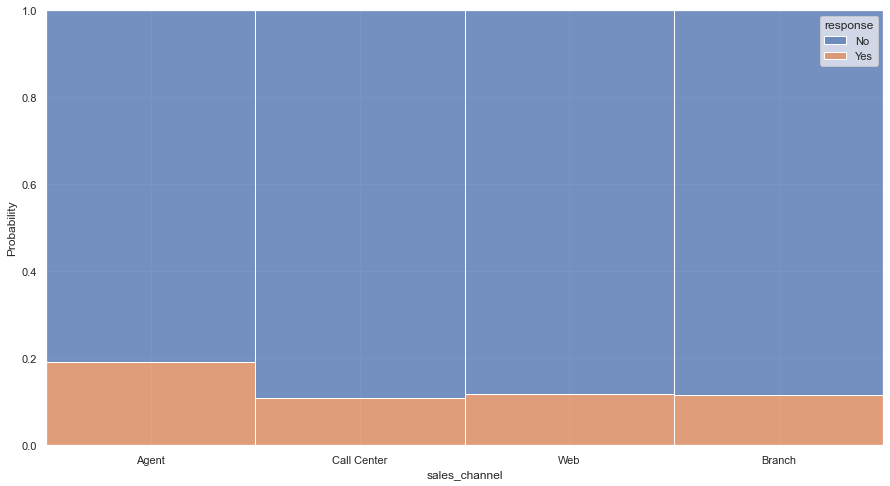

In [55]:
 sns.histplot(data=marketing_customers, x='sales_channel', hue='response', stat='probability', multiple="fill")

## Customer Analysis Round 4

In [56]:
# import using marketing customer analysis.csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

#fresh_customers = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')
#fresh_customers = 

### Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [57]:
numericals = marketing_customers.select_dtypes(include=np.number)
categoricals = marketing_customers.select_dtypes(include=object)
print("----- marketing_customers.dtypes -----")
print(marketing_customers.dtypes)
print()
print("----- numericals.dtypes -----")
print(numericals.dtypes)
print()
print("----- categoricals.dtypes -----")
print(categoricals.dtypes)

----- marketing_customers.dtypes -----
customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
s

##### Use seaborn library to construct distribution plots for the numerical variables

In [58]:
numericals.dtypes

customer_lifetime_value          float64
income                             int64
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
total_claim_amount               float64
dtype: object

<AxesSubplot:xlabel='customer_lifetime_value', ylabel='Count'>

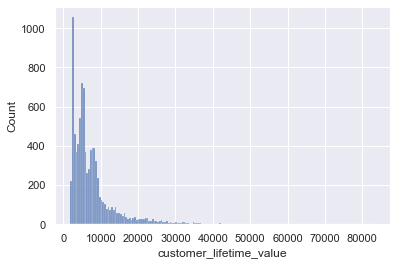

In [59]:
sns.histplot(data=numericals, x='customer_lifetime_value')

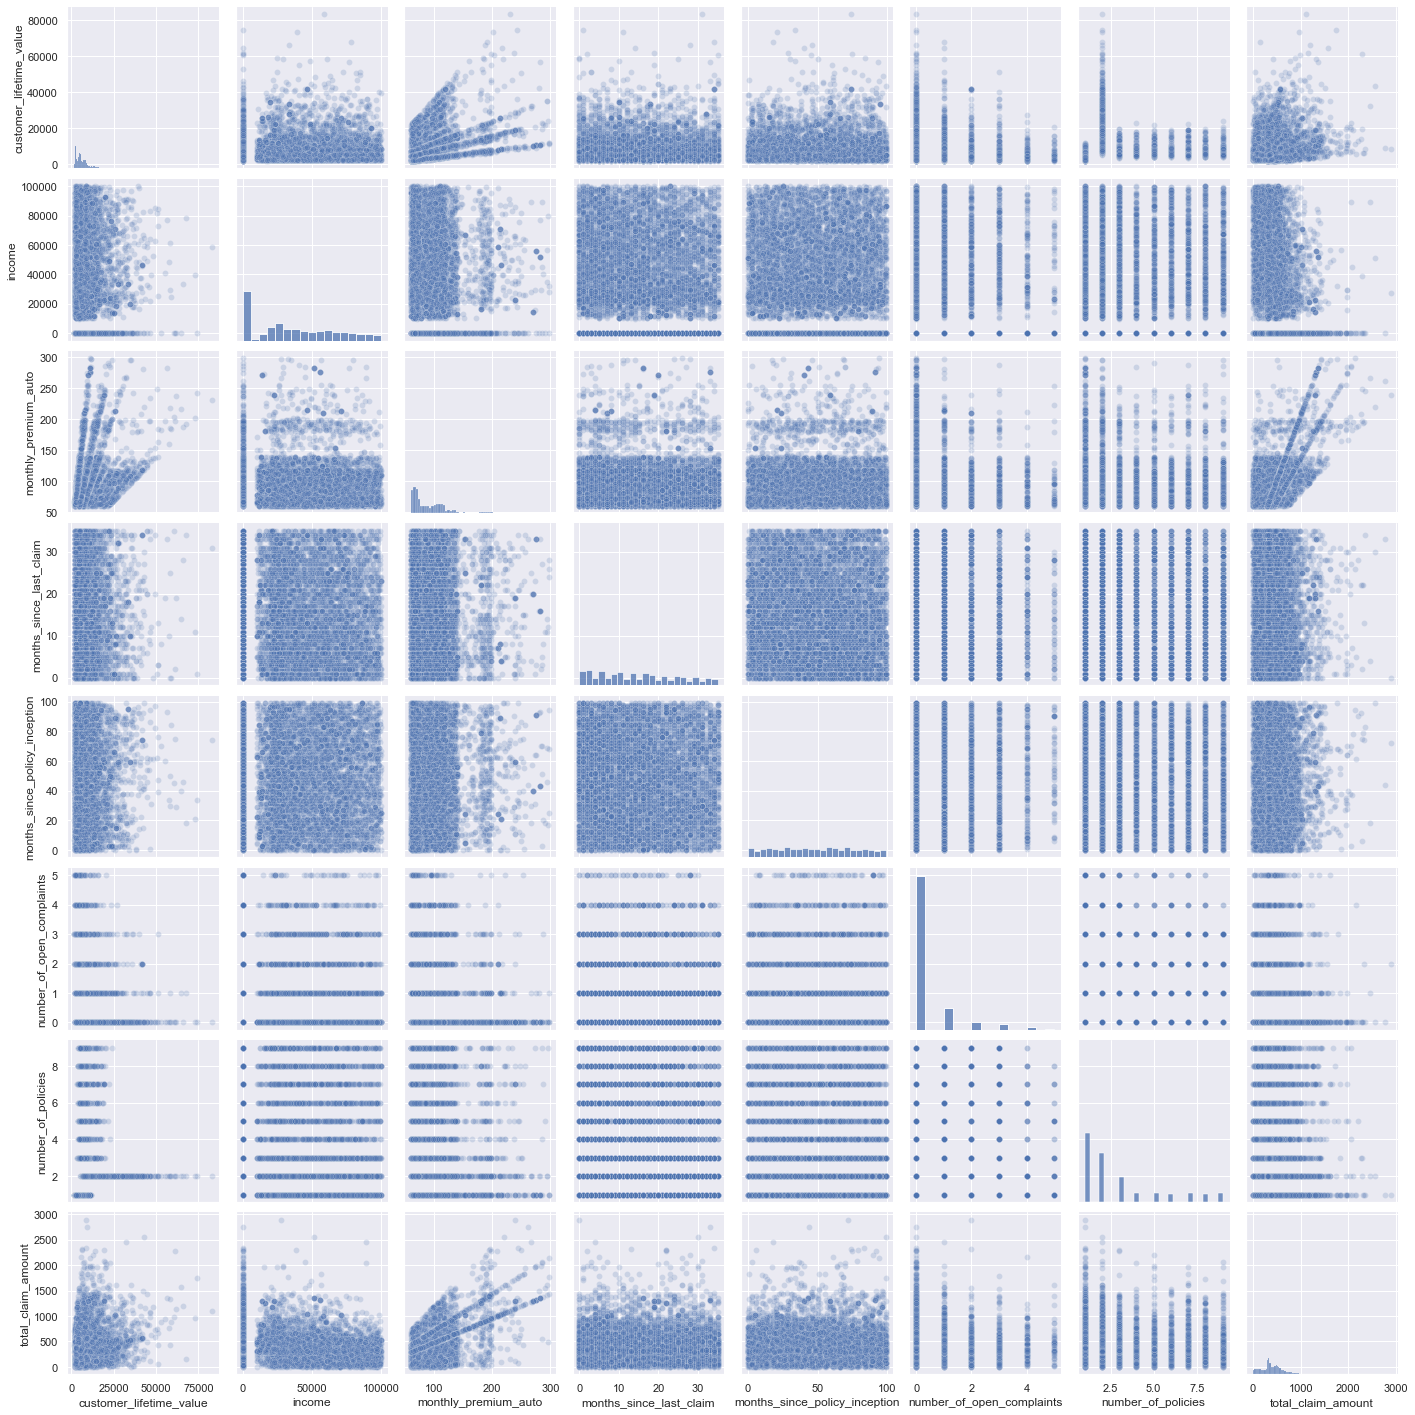

In [60]:
sns.pairplot(numericals, kind='scatter', plot_kws=dict(alpha=0.2) )
#sns.pairplot(numericals, kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})

#histograms shown in diagonal

##### Use Matplotlib to construct histograms

customer_lifetime_value


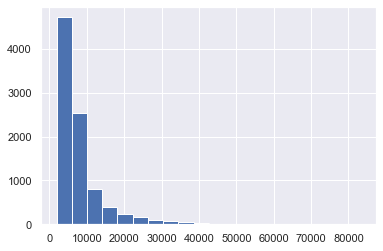

income


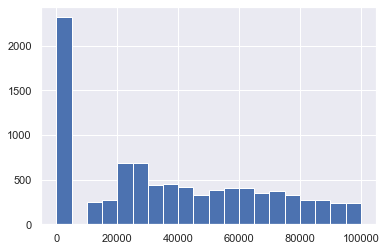

monthly_premium_auto


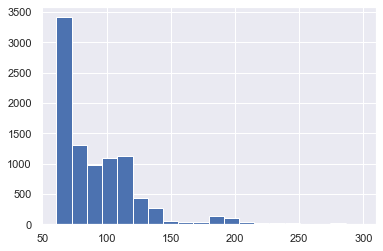

months_since_last_claim


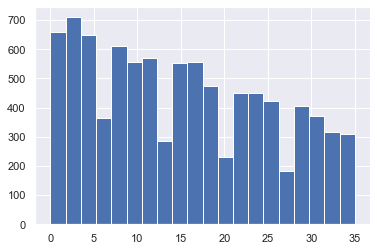

months_since_policy_inception


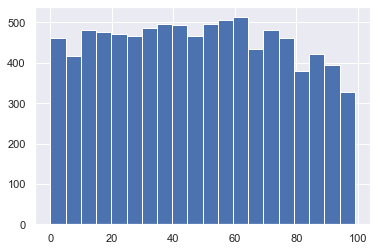

number_of_open_complaints


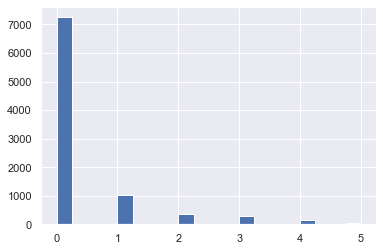

number_of_policies


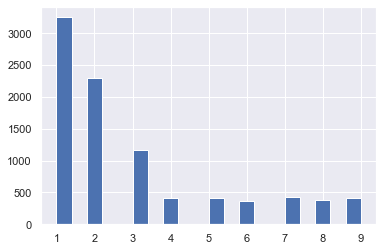

total_claim_amount


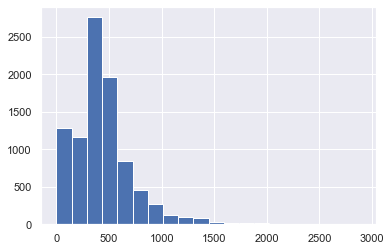

In [62]:
for col in numericals.columns:
    print(col)
    numericals[col].hist(bins=20)
    plt.show()

##### Do the distributions for different numerical variables look like a normal distribution

No, none of the charts look like a normal distribution as they are not symetrical, and don't taper at both ends.

### For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

In [63]:
y = numericals['total_claim_amount']
X = numericals.drop(['total_claim_amount'], axis=1)
lm = linear_model.LinearRegression()
lm.fit(X,y)
print(lm.score(X,y))
y_pred = lm.predict(X)
print(mean_squared_error(y_pred,y))

0.5186628226558787
40615.74326224916


In [64]:
numericals.corr()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


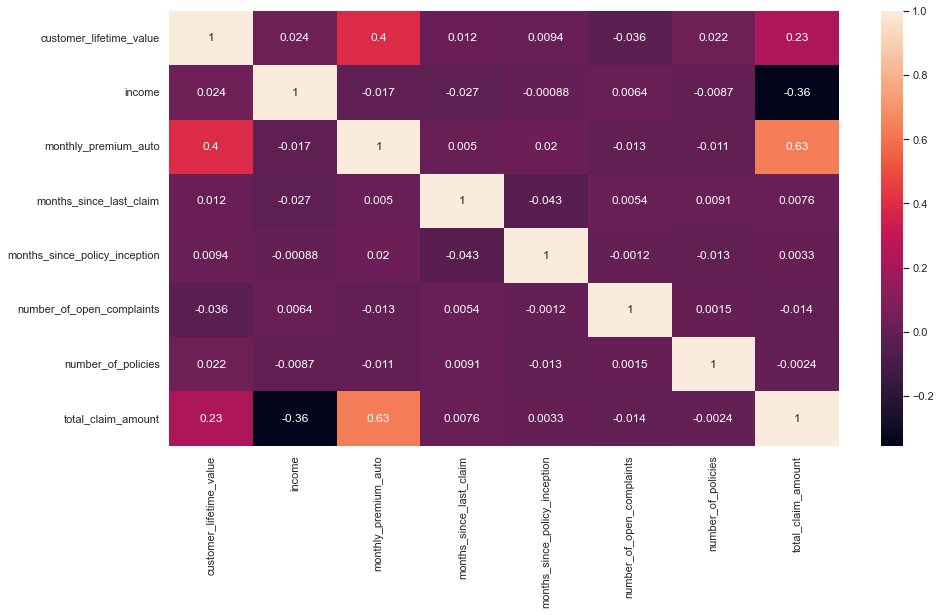

In [65]:
sns.set(rc = {'figure.figsize':(15,8)})
correlations_matrix = numericals.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

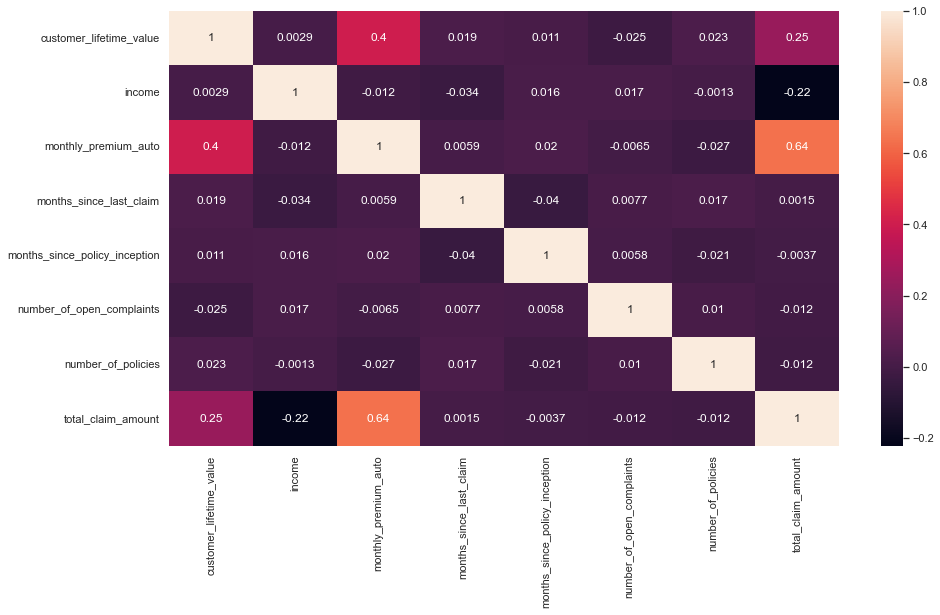

In [66]:
numericals2 = numericals[numericals.income>0]
correlations_matrix = numericals2.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

(-70000.0, 110000.0)

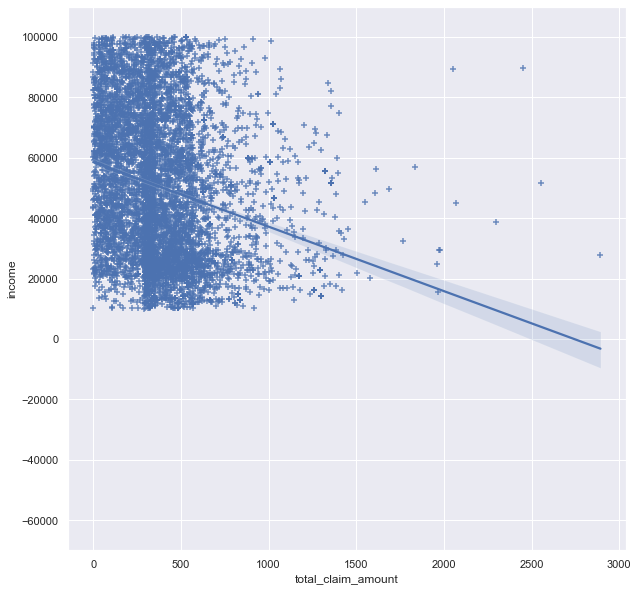

In [67]:
sns.set(rc = {'figure.figsize':(10,10)})

ax = sns.regplot(x=numericals2.total_claim_amount, y=numericals2.income, marker="+")
ax.set_ylim(-70000,110000)

(-70000.0, 110000.0)

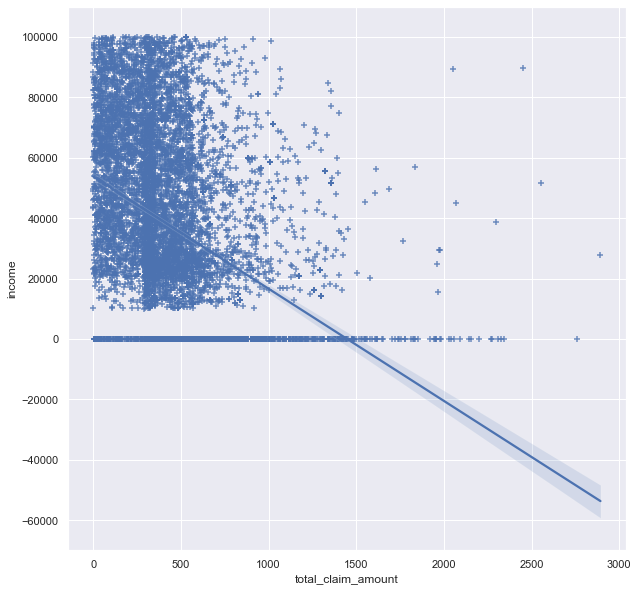

In [68]:
ax = sns.regplot(x=numericals.total_claim_amount, y=numericals.income, marker="+")
ax.set_ylim(-70000,110000)

For Total Claim Amount:
Fairly reasonable positive correlation with Monthly Premium Auto 
Some positive correlation with Customer Lifetime Value
Some negative correlation with Income
The rest of our numericals have almost zero correlation with Total Claim Amount

Out of our features:
There is some correlation between Customer Lifetime Value and Monthly Premium Auto though not so strong that we should exclude either.

*Note: Income has a negative correlation due to high volume of zero values*

### Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

None of the features share a high correlation so not dropping any

## Customer Analysis Round 5

### X-y split.

In [69]:
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

y = numericals['total_claim_amount']
#X = numericals.drop(['Total Claim Amount'], axis=1)
X = numericals[['customer_lifetime_value','income','monthly_premium_auto']]

### Normalize

In [70]:
# Normalizing data: make data range from 0 - 1, instead of from min to max
transformer = MinMaxScaler().fit(X)
x_normalized = transformer.transform(X)
print(x_normalized.shape)
minmaxscaled = pd.DataFrame(x_normalized, columns=X.columns)
minmaxscaled

(9134, 3)


,customer_lifetime_value,income,monthly_premium_auto
0,0.010629,0.562847,0.033755
1,0.062406,0.000000,0.139241
2,0.134960,0.487763,0.198312
3,0.070589,0.000000,0.189873
4,0.011245,0.438443,0.050633
...,...,...,...
9129,0.264137,0.719547,0.050633
9130,0.014719,0.216081,0.075949
9131,0.076951,0.000000,0.101266
9132,0.069098,0.219452,0.147679


### Extra Stuff

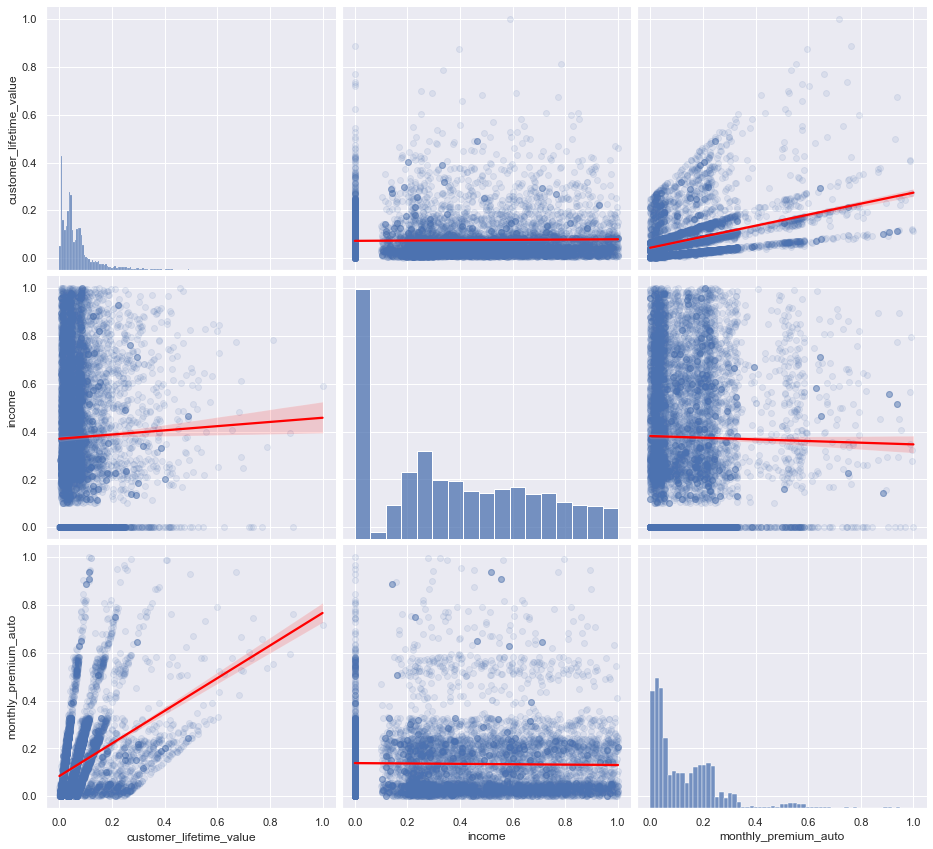

In [71]:
sns.pairplot(minmaxscaled, height=4, aspect=1.1, kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})

customer_lifetime_value


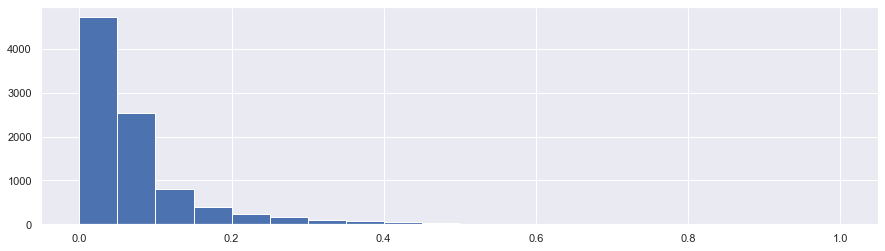

income


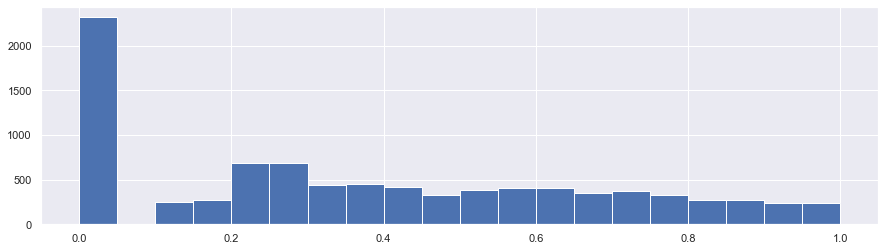

monthly_premium_auto


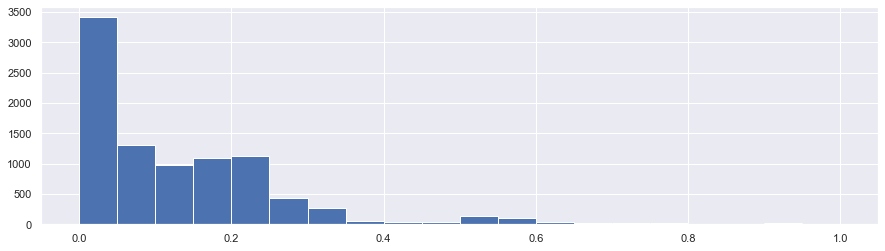

In [72]:
sns.set(rc = {'figure.figsize':(15,4)})

for col in minmaxscaled.columns:
    print(col)
    minmaxscaled[col].hist(bins=20)
    plt.show()

# taking a closer look at income chart without the 0 values.   
# minmaxscaled2 = minmaxscaled[minmaxscaled['income']>0]

# for col in minmaxscaled2.columns:
#     print(col)
#     minmaxscaled2[col].hist(bins=20)
#     plt.show()


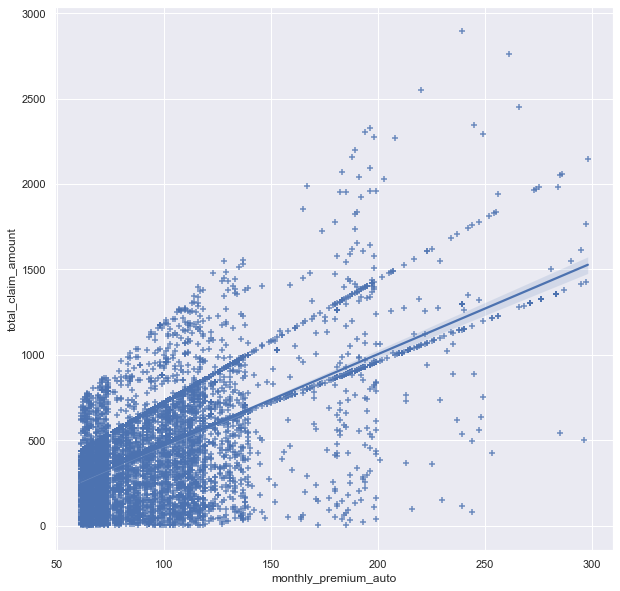

In [73]:
sns.set(rc = {'figure.figsize':(10,10)})
ax = sns.regplot(x=numericals.monthly_premium_auto, y=numericals.total_claim_amount, marker="+")

In [74]:
categoricals.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


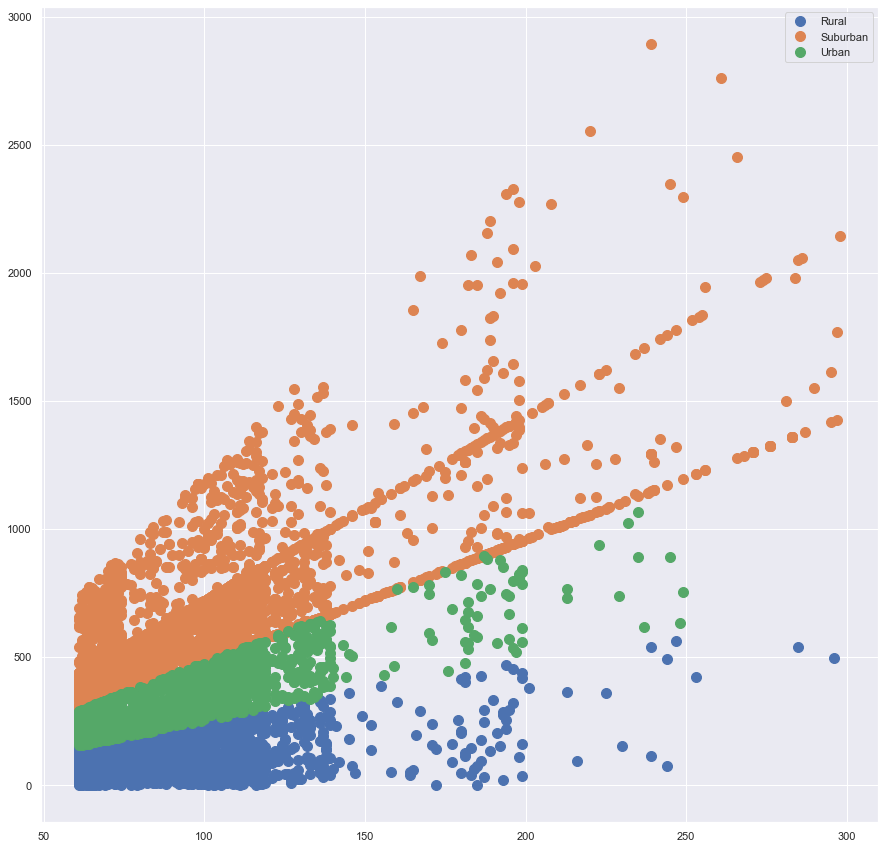

In [28]:
sns.set(rc = {'figure.figsize':(15,15)})
# for col in categoricals:
groups = marketing_customers.groupby('location_code')
for name, group in groups:
    #plt.plot(group.monthly_premium_auto, group.total_claim_amount, marker='o', linestyle='', markersize=10, label=name, alpha=0.1)
    plt.plot(group.monthly_premium_auto, group.total_claim_amount, marker='o', linestyle='', markersize=10, label=name)

plt.legend()


##
## Customer Analysis Round 6

* ##### One Hot/Label Encoding (categorical).
* ##### Concat DataFrames

In [76]:
# X-y split 
# marketing_customers: cleaned data from file
# numericals: numerical data only
# categoricals: catagorical data only
# minmaxscaled: numerical data minmaxscaled

##### For this round I'll apply one type of encoder to the whole set then try the whole set with the other encoder - then look to improve this by seeing which columns work best with which encoders & transformations

In [79]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [78]:
categoricals.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [94]:
# we do not what to treat each customer as category so we drop this.
X_cat = categoricals.drop(['customer'], axis=1)

In [136]:
# following on from the above, lets check the rest of the fields to see if they may need further processing/be removed
for col in categoricals.columns:
    print(col + ":" + str(categoricals[col].nunique()))

customer:9134
state:5
response:2
coverage:3
education:5
employmentstatus:5
gender:2
location_code:3
marital_status:3
policy_type:3
policy:9
renew_offer_type:4
sales_channel:4
vehicle_class:6
vehicle_size:3


#### That is one hot encoder

In [113]:
encoder = OneHotEncoder(drop='first').fit(X_cat)
print(encoder.categories_)
encoded = encoder.transform(X_cat).toarray()
#print(encoded)
onehot_encoded = pd.DataFrame(encoded)
onehot_encoded.head()

[array(['Arizona', 'California', 'Nevada', 'Oregon', 'Washington'],
      dtype=object), array(['No', 'Yes'], dtype=object), array(['Basic', 'Extended', 'Premium'], dtype=object), array(['Bachelor', 'College', 'Doctor', 'High School or Below', 'Master'],
      dtype=object), array(['Disabled', 'Employed', 'Medical Leave', 'Retired', 'Unemployed'],
      dtype=object), array(['F', 'M'], dtype=object), array(['Rural', 'Suburban', 'Urban'], dtype=object), array(['Divorced', 'Married', 'Single'], dtype=object), array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object), array(['Corporate L1', 'Corporate L2', 'Corporate L3', 'Personal L1',
       'Personal L2', 'Personal L3', 'Special L1', 'Special L2',
       'Special L3'], dtype=object), array(['Offer1', 'Offer2', 'Offer3', 'Offer4'], dtype=object), array(['Agent', 'Branch', 'Call Center', 'Web'], dtype=object), array(['Four-Door Car', 'Luxury Car', 'Luxury SUV', 'SUV', 'Sports Car',
       'Two-Door Car'], dtype=object), ar

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [120]:
X = pd.concat([minmaxscaled, onehot_encoded], axis=1)
y = marketing_customers.total_claim_amount

In [117]:
X.head()

,customer_lifetime_value,income,monthly_premium_auto,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
0,0.010629,0.562847,0.033755,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.062406,0.000000,0.139241,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.134960,0.487763,0.198312,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.070589,0.000000,0.189873,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.011245,0.438443,0.050633,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [122]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

In [154]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as unkind_squared_error
predictions = lm.predict(X_train)
print('*** One Hot Encoder ***')
print('--- training data ---')
print('R2:   ' + str(r2_score(y_train, predictions)))
print()
predictions = lm.predict(X_test)
print('--- test data ---')
print('R2:       ' + str(r2_score(y_test, predictions)))
print('MSE:      ' + str(unkind_squared_error(y_test,predictions)))
print('RMSE/MAE: ' + str(np.sqrt(unkind_squared_error(y_test,predictions))))


*** One Hot Encoder ***
--- training data ---
R2:   0.7737704713204777

--- test data ---
R2:       0.7613614605401583
MSE:      18974.398639937437
RMSE/MAE: 137.74759032352412


#### Label encoder - since labels are somehow hierachical and names mean things...or I'm probably missing something

In [166]:
# encoder = OneHotEncoder(drop='first').fit(X_cat)
# print(encoder.categories_)
# encoded = encoder.transform(X_cat).toarray()
# #print(encoded)
# onehot_encoded = pd.DataFrame(encoded)
# onehot_encoded.head()

#label_encoded = LabelEncoder().fit(X_cat).transform(X_cat) # ordered wrt value counts
#label_encoded = pd.DataFrame(label_encoded,columns=X_cat.columns)
#print(label_encoded)

# we can't take the same approach we took with the One Hot Encoder as LabelEncoder only takes a single column input
# looping is an option but googling label encoder with multiple columns was another option.
# ** unsure how a label encoder is going to get the right hierachy. ie, small, medium, large = 0,1,2 and not = 2,0,1.

# ##### loop - same result as applying LabelEncoder().fit_transform on the df
# label_encoded = pd.DataFrame(data=None, columns=X_cat.columns)
# for col in X_cat:
#     label_encoded[col] = LabelEncoder().fit(X_cat[col]).transform(X_cat[col])
# display(label_encoded.head())

# google is my friend
label_encoded = X_cat.apply(LabelEncoder().fit_transform)
display(label_encoded.head())


,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,4,0,0,0,1,0,1,1,0,2,0,0,5,1
1,0,0,1,0,4,0,1,2,1,5,2,0,0,1
2,2,0,2,0,1,0,1,1,1,5,0,0,5,1
3,1,0,0,0,4,1,1,1,0,1,0,2,3,1
4,4,0,0,0,1,1,0,2,1,3,0,0,0,1


In [149]:
X_cat.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [152]:
# check numbers got assigned to which categories....

wibble = pd.concat([X_cat, label_encoded],axis=1)
wibble

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,4,0,0,0,1,0,1,1,0,2,0,0,5,1
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,0,0,1,0,4,0,1,2,1,5,2,0,0,1
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,2,0,2,0,1,0,1,1,1,5,0,0,5,1
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,1,0,0,0,4,1,1,1,0,1,0,2,3,1
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,4,0,0,0,1,1,0,2,1,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize,1,0,0,0,1,1,2,1,1,3,1,3,0,1
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize,1,1,1,1,1,0,1,0,0,2,0,1,0,1
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize,1,0,1,0,4,1,1,2,0,1,0,1,0,1
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large,1,0,1,1,1,1,1,1,1,4,2,1,0,0


*Note: ...ok, so not order but that would be kinda magic if they did - will look into that later and just compare the encodings as is*

In [177]:
X2 = pd.concat([minmaxscaled, label_encoded], axis=1) #17 columns
y2 = marketing_customers.total_claim_amount

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

lm2 = linear_model.LinearRegression()
model2 = lm2.fit(X_train2,y_train2)
predictions2 = lm2.predict(X_train2) 

print('*** Label Encoder ***')
print('--- training data ---')
print('R2:   ' + str(r2_score(y_train2, predictions2)))
print()
predictions2 = lm2.predict(X_test2)
print('--- test data ---')
print('R2:       ' + str(r2_score(y_test2, predictions2)))
print('MSE:      ' + str(unkind_squared_error(y_test2,predictions2)))
print('RMSE/MAE: ' + str(np.sqrt(unkind_squared_error(y_test2,predictions2))))




*** Label Encoder ***
--- training data ---
R2:   0.6101171623714545

--- test data ---
R2:       0.6016543812441839
MSE:      31672.87473286486
RMSE/MAE: 177.96874650585383


#### So from the results when applying label encoder to all categories vs one hot encoder, one hot encoder produces a more accurate prediction.

#### Maybe due to most columns not being hierachical and arbiturary hierachy applied to the ones that are - will investigate more in round 7!

##
## Customer Analysis Round 7

* Bonus: BUild a function, from round 2 and round 7, to clean and process the data
* Explorer the data (done in round 3)
* Try to improve the linear regression model

In [4]:
# imports
import pandas as pd

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

######
#### standardize column headings

In [6]:
def prep_headings(my_df, columns_that_should_be_dates):
    # remove Unnamed: 0
    # my_df = my_df.drop(columns=['Unnamed: 0'])

    # drop to lower case
    my_df.columns = list(map(lambda x:x.lower(),my_df.columns))

    # replace spaces with _
    my_df.columns = list(map(lambda x:x.replace(' ','_'),my_df.columns))

    # set 'effective_to_date' to date type ----
    my_df[columns_that_should_be_dates] = pd.to_datetime(my_df[columns_that_should_be_dates])
    
    return my_df

In [5]:
customers_r7 = pd.read_csv('files_for_lab//csv_files//marketing_customer_analysis.csv')

In [8]:
customers_r7 = prep_headings(customers_r7, 'effective_to_date') # so the date type conversion is a little funky here

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

######
#### clean the data

In [12]:
# function but specific to our customer analysis data

# (future andy could figure out how to dynamically have function decide if NaNs in a column should be: 
#                        set to unknown, set to most popular category, randomly distributed, ignored, set to mean, set to 0, purged by fire, cried over, tickled....)


def please_handle_my_nans(my_df):

    # delete    df = df[<filter>]
    #my_df = my_df[marketing_customers['state'].isna()==False]
    #my_df = my_df[marketing_customers['state']!='Unknown']
    #above would also apply to resposne anyway

    # fill in another value    .fillna(<value>)
    my_df['state'] = my_df['state'].fillna('Unknown')
    my_df['response'] = my_df['response'].fillna('Unknown')

    #my_df['months since last claim'] = my_df['months since last claim'].fillna(0)
    #my_df['number of open complaints'] = my_df['number of open complaints'].fillna(0)
    # or
    my_df['months_since_last_claim'] = my_df['months_since_last_claim'].fillna(my_df['months_since_last_claim'].mean())
    my_df['number_of_open_complaints'] = my_df['number_of_open_complaints'].fillna(my_df['number_of_open_complaints'].mean())

    my_df['vehicle_class'] = my_df['vehicle_class'].fillna('Four-Door Car')
    my_df['vehicle_size'] = my_df['vehicle_size'].fillna('Medsize')
    
    return my_df

In [13]:
customers_r7 = please_handle_my_nans(customers_r7) # currently just specific adjustments to customer data set

######
#### process the data

In [17]:
# potential process functions

# correlation pair check
# description:   using a numerical data frame provides correlations between them
# input:         df with 2 numerical columns
# output:        correlation_value
# process:       err, check above

# select numerical features
# description:   drop columns that have low correlation to target or very high correlation with each other
# input:         df, target, min_correlation_with_target=0.1?, max_correlation_with_other_feature=0.9?
# options:       keep_target (drop or keep target in output)
# output:        df
# process:       pull numericals, check correlation against target, check correlation of features against each other, filter based on min/max values provided, return filtered df

# select categorical features
# description:   drop columns that have lots of categories - perhaps later also create 'other' when suitable
# input:         df, category_limit
# output:        df
# process:       pull categoricals, check number of unique if over limit filter them, return filtered df

# scaling (for numericals but handle in function)
# description:    applies scaling methods to numerical data depending on provided column lists for each method
# input:          df, target, minmaxscaler_numericals, standardscaler_numericals
# output:         df
# process: pull numericals, drop target, split into ones for minmax and ones for standard, apply appropriate scaling to each, bring both back into data

# encoding (for categoricals but handle in function)
# description:    applies encoding methods to categorical data depending on provided column lists for each method
# input:          df, target, onehotcategoricals, labelcategoricals, labelcategoricals_datadictionary??
# output          df
# process:pull categoricals, split into ones for onehot and ones for label encoding, bring back into data



######
#### modeling - try to improve the linear regression model

##### *Initial Thoughts* - will not have time to implement or check all, will try to do some though


* visualise/check impact of categoricals
    * exclude redundant ones

* drop redundant columns
    * numerical
        * no correlation with target
        * very high correlation with other features
    * categorical
        * drop or manage columns with excessive number of categories (ie. customer id)
    * date
        * date columns - in general would be likely to have some value - potentially treat these as numerical or categorical with cohorts

* numericals - use log to make them closer to normal distros then use standard scaler instead of min max scaler
    * perhaps it will work better on some columns than on others

* apply econding for categoricals depending on each columns categories (label encoder for hierarchical / one hot encoder for ...errr, non-hierachical)

* check into label encoder more to see if we can properly sort the hierarchical data - potentially user ordinal encoder instead and provide it with dictionarys for the sorting

* some data specifics - after eyeballing the data, things to possible try:
    * policy alone isn't quite hierarchical but combined with policy type - could be split into personal policies and corperate policies which then might be hierachical
    * only take columns that logically impact target - then try adding in others to see if it creates a better model

######
##### *Lets try min max and one hot encoder but use label encoder instead for * 

######
##### *Checking ordinal encoding with true hierachy on a suitable column and see if that improves our end result* 

In [29]:
# ie. taking car size from smallest to largest

# ie. taking location code as we've seen there is a tendancy for higher claims from suburban than from urban and from rural.
# even though it isn't something you'd initially consider hierachical 
# suburban = 2
# urban = 1
#rural = 0